# Breast Cancer Campaign - Cummulative Project - Module 3

# 1 Reading the Dataset
Load the previously preprocessed dataset saved in the CSV file “data_refined.csv” into a Pandas DataFrame.
Hint: make sure you completed the accumulative project for Module 1.

In [24]:
import pandas as pd
df = pd.read_csv('data_refined.csv')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


#2 Feature Selection
-----------------

Choosing only the most important features for training your classifier is one of the most important steps of the machine learning process. This can be done in many ways.One of the simplest approaches is choosing the features with the highest correlation to the target data.The label in this case is the 'Diagnosed' column.The Diagnosed column has two distinct values:

-   M: Malignant Tumor
-   B: Benign Tumor

Calculate the correlation of all the features to their target labels.Choose the most correlated features above a certain limit for training.
Output a list of important feature names.

In [25]:
import seaborn as sns

correlation_matrix = df.corr()
correlation_matrix



,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


Extract the target column into y. 

I will choose columns with a correlation value higher than 0.6 to the target "diagnosis". 

In [26]:

high_corr_cols = [col for col in correlation_matrix.columns if (correlation_matrix['diagnosis'][col] > 0.6) and (col != 'diagnosis')]

print(high_corr_cols)


['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']


Next create a new dataframe X with only relevant columns

In [27]:
df_reduced = df[high_corr_cols]
df_reduced.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,0.521037,0.545989,0.363733,0.703140,0.731113,0.620776,0.668310,0.450698,0.568610,0.912027
1,0.643144,0.615783,0.501591,0.203608,0.348757,0.606901,0.539818,0.435214,0.192971,0.639175
2,0.601496,0.595743,0.449417,0.462512,0.635686,0.556386,0.508442,0.374508,0.359744,0.835052
3,0.210090,0.233501,0.102906,0.565604,0.522863,0.248310,0.241347,0.094008,0.548642,0.884880
4,0.629893,0.630986,0.489290,0.463918,0.518390,0.519744,0.506948,0.341575,0.319489,0.558419


# 3 Splitting the Data
Split your data as follows:
* 80% training set
* 10% validation set
* 10% test set

I will split the dataframes during the training step since it is easier to reuse the code.

In [28]:
y = df['diagnosis']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

# 4 Training Classifiers
Use KNN classifier, random forest classifier, and support vector classifier (SVC) models to train your data.
 Train your full features dataset and your reduced set features dataset.   
 Get accuracy scores and confusion matrices for both. You need a minimum accuracy score of 94%.  
 Compare the results.  
Hint: you need to choose the optimal value for k using cross validation.

Full Feature Dataset

In [29]:
df_full = df.drop('diagnosis', axis=1)

In [30]:
df_full.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [31]:
#assign the full dataframe to x
x = df_full
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


# Using Full Features Dataset

In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [50]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
X_validate, X_test, y_validate, y_test = train_test_split(X_test,y_test, test_size = 0.5, random_state = 0)
print(len(X_train), len(X_test), len(X_validate))

455 57 57


## Use KNN classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier 

In [36]:
scores = []
neighbors = range(1,20)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    results = knn.score(X_test,y_test)
    scores.append(results)
    
print(scores)

[0.9649122807017544, 0.9298245614035088, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9649122807017544, 0.9824561403508771, 0.9649122807017544, 0.9824561403508771]


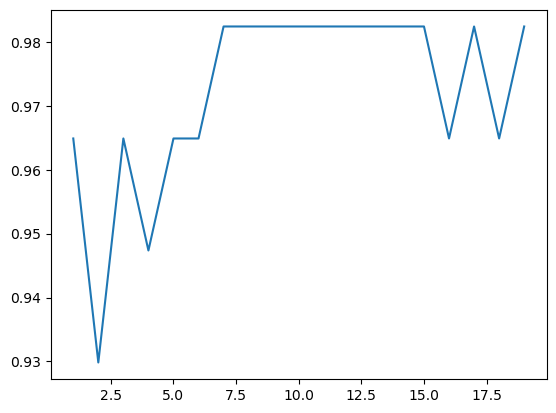

In [37]:
plt.plot(neighbors,scores)

I will chose K = 10 since from the plot it looks like it tops out along with K values between 8-15

In [38]:
knn = KNeighborsClassifier(n_neighbors=10).fit(X_train,y_train)

Print the accuracy score of your final classifier.

In [39]:
result = knn.score(X_validate,y_validate)
print("Accuracy = ", result)

Accuracy =  0.9649122807017544


Print the confusion matrix.

In [40]:
predictions = knn.predict(X_validate)
print('Confusion Matrix: \n',confusion_matrix(y_validate,predictions))

Confusion Matrix: 
 [[35  0]
 [ 2 20]]


## Use random forest classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [42]:
result = rf.score(X_validate,y_validate)
print("Accuracy = ", result)

Accuracy =  0.9824561403508771


Print the confusion matrix.

In [43]:
predictions = rf.predict(X_validate)
print('Confusion Matrix: \n',confusion_matrix(y_validate,predictions))

Confusion Matrix: 
 [[34  1]
 [ 0 22]]


## Use support vector classifier (SVC)

In [44]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [45]:
result = svc.score(X_validate,y_validate)
print("Accuracy = ", result)

Accuracy =  0.9824561403508771


Print the confusion matrix.

In [46]:
predictions = svc.predict(X_validate)
print('Confusion Matrix: \n',confusion_matrix(y_validate,predictions))

Confusion Matrix: 
 [[35  0]
 [ 1 21]]


# Using reduced set features dataset

In [51]:
#assigning a new x fromt the reduced dataset
x = df_reduced
x.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,0.521037,0.545989,0.363733,0.703140,0.731113,0.620776,0.668310,0.450698,0.568610,0.912027
1,0.643144,0.615783,0.501591,0.203608,0.348757,0.606901,0.539818,0.435214,0.192971,0.639175
2,0.601496,0.595743,0.449417,0.462512,0.635686,0.556386,0.508442,0.374508,0.359744,0.835052
3,0.210090,0.233501,0.102906,0.565604,0.522863,0.248310,0.241347,0.094008,0.548642,0.884880
4,0.629893,0.630986,0.489290,0.463918,0.518390,0.519744,0.506948,0.341575,0.319489,0.558419


In [52]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
X_validate, X_test, y_validate, y_test = train_test_split(X_test,y_test, test_size = 0.5, random_state = 0)
print(len(X_train), len(X_test), len(X_validate))

455 57 57


## Use KNN classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier 

In [54]:
scores = []
neighbors = range(1,20)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    results = knn.score(X_test,y_test)
    scores.append(results)
    
print(scores)

[0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9298245614035088, 0.9649122807017544, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088]


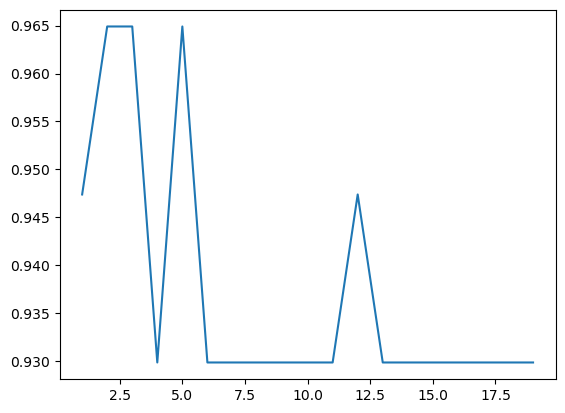

In [55]:
plt.plot(neighbors,scores)

I will chose K = 5

In [65]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)

Print the accuracy score of your final classifier.

In [66]:
result = knn.score(X_validate,y_validate)
print("Accuracy = ", result)

Accuracy =  0.9122807017543859


Print the confusion matrix.

In [67]:
predictions = knn.predict(X_validate)
print('Confusion Matrix: \n',confusion_matrix(y_validate,predictions))

Confusion Matrix: 
 [[32  3]
 [ 2 20]]


## Use random forest classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [69]:
result = rf.score(X_validate,y_validate)
print("Accuracy = ", result)

Accuracy =  0.9473684210526315


Print the confusion matrix.

In [70]:
predictions = rf.predict(X_validate)
print('Confusion Matrix: \n',confusion_matrix(y_validate,predictions))

Confusion Matrix: 
 [[33  2]
 [ 1 21]]


## Use support vector classifier (SVC)

In [71]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [72]:
result = svc.score(X_validate,y_validate)
print("Accuracy = ", result)

Accuracy =  0.9298245614035088


Print the confusion matrix.

In [73]:
predictions = svc.predict(X_validate)
print('Confusion Matrix: \n',confusion_matrix(y_validate,predictions))

Confusion Matrix: 
 [[33  2]
 [ 2 20]]


It appears the accuracies are higher with the full dataset vs the reduced dataset. Eventhough the reduced dataset contains the most significantly contributing variables, the full dataset contains extra variables that can make a small contribution to the accuracy of the tests. 